In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill'>

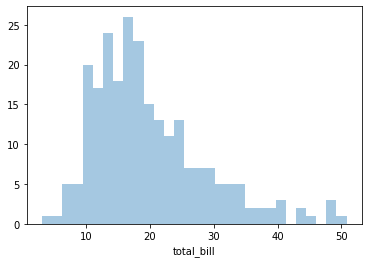

In [7]:
sns.distplot(tips['total_bill'],kde=False,bins=30) # to display density of a column in a data set, kde - the line

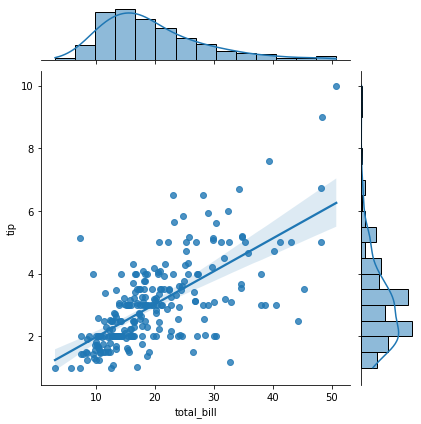

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')#kind - allows us to change the scatter plot to another kind of a plot #match 2 distplots by 2 variables; to compare to variables

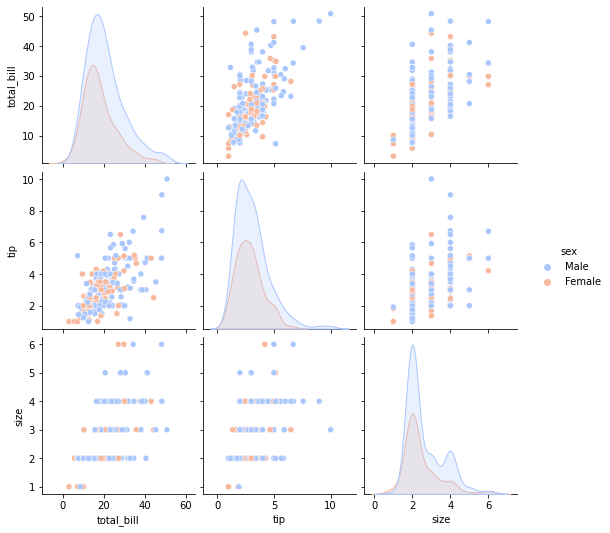

In [16]:
sns.pairplot(tips,hue='sex',palette='coolwarm') #hue - categorical column, it will colour points based of this column we specify
#corr relation between numerical columns; does joint plot for every possible combination

<AxesSubplot:xlabel='total_bill'>

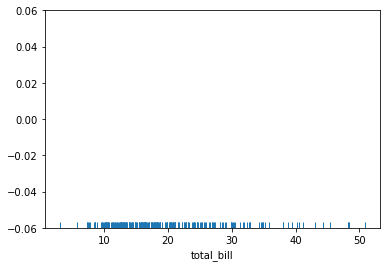

In [18]:
sns.rugplot(tips['total_bill'])

In [ ]:
#kde - kernal density estimation plot

(0.0, 1.0)

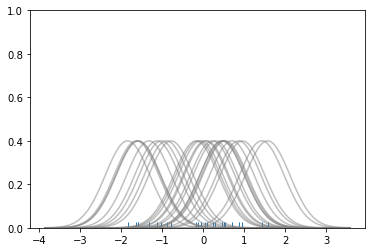

In [19]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

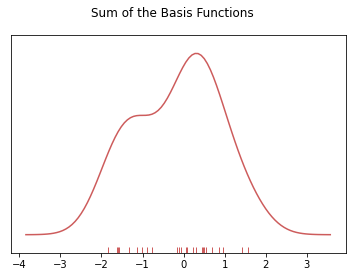

In [20]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

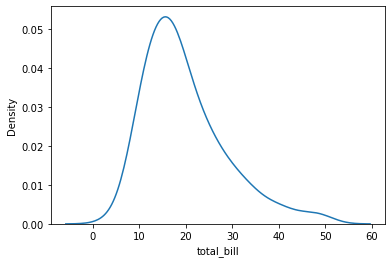

In [21]:
sns.kdeplot(tips['total_bill'])

In [23]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

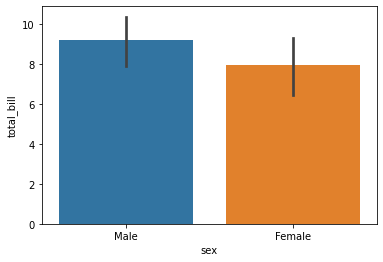

In [24]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std) 
# deafoault function - mean, shows the avarage total bill based of  sex
# categorical columns and num columns
# estimator - function we want to perform on out data, np.std - standard deviation 

<AxesSubplot:xlabel='sex', ylabel='count'>

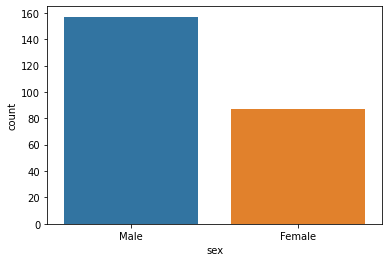

In [25]:
sns.countplot(x='sex',data=tips) # like in pandas count() on a column, counts the occurances 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

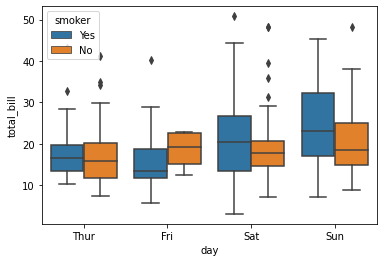

In [27]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker') 
# quartiles - coloured,bottom of the whisker to the bottom of a box, bottom of a box till middle etc.. 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

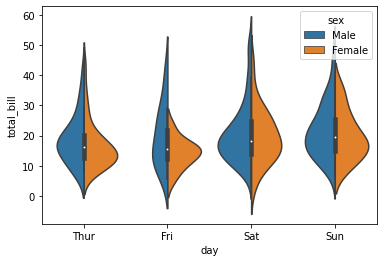

In [31]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True) #split we dont get 2 plots next to each other

<AxesSubplot:xlabel='day', ylabel='total_bill'>

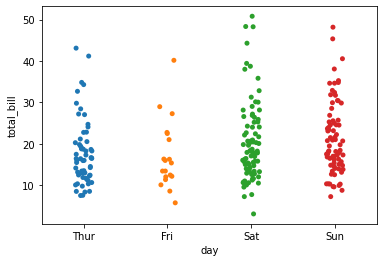

In [36]:
sns.stripplot(x='day',y='total_bill',data=tips) #here - jitter True(separates plots) by default

<AxesSubplot:xlabel='day', ylabel='total_bill'>

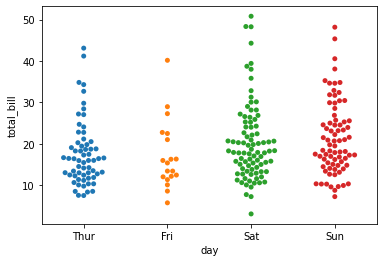

In [37]:
sns.swarmplot(x='day',y='total_bill',data=tips) # violin combined with strip plot

/Users/przemyslawgolonka/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


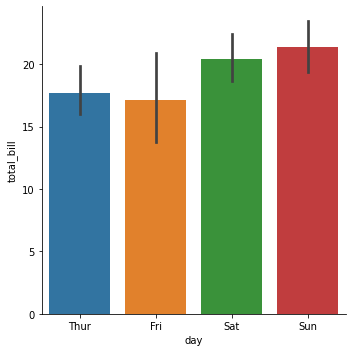

In [38]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar') #general method to make a plot by specifying kind of a plot we want to do 

In [40]:
flights = sns.load_dataset('flights')

In [41]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [43]:
tc = tips.corr() # that we need for  creating heat maps 

<AxesSubplot:>

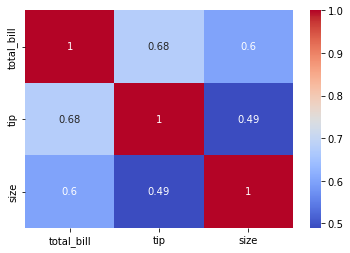

In [46]:
sns.heatmap(tc,annot=True,cmap='coolwarm') # colours the correlation between data
# annot - number of correlation

In [50]:
fp = flights.pivot_table(index='month',columns='year',values='passengers') 
# we need to make a matrix format of a dataset in order to perform correlation on that

<AxesSubplot:xlabel='year', ylabel='month'>

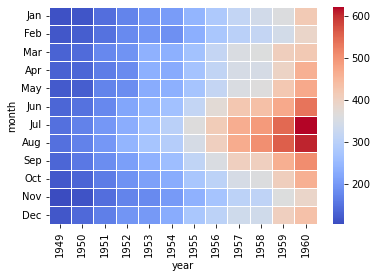

In [54]:
sns.heatmap(fp,cmap='coolwarm',linecolor='white',linewidths=1)

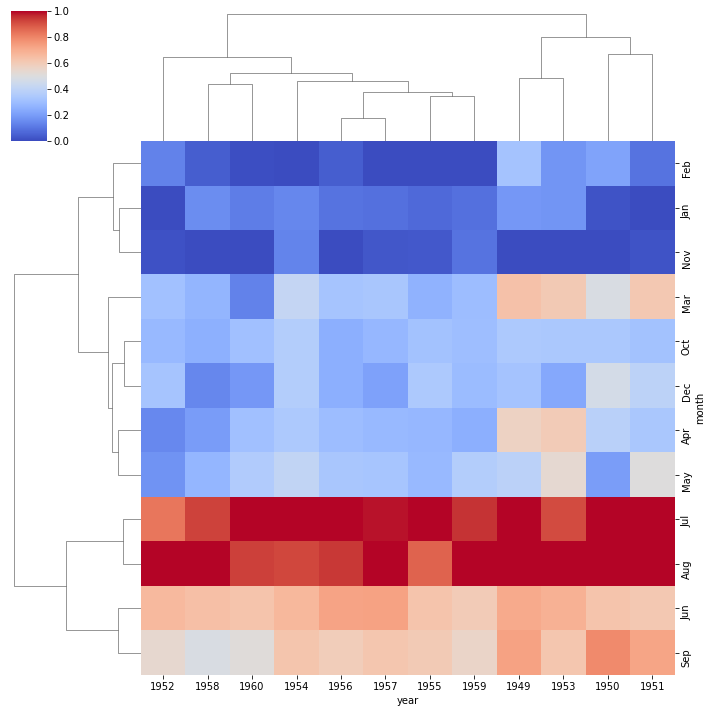

In [58]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)# cluster rows and columns based of the simmilarity

In [59]:
iris = sns.load_dataset('iris')

In [60]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

/Users/przemyslawgolonka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/przemyslawgolonka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/przemyslawgolonka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

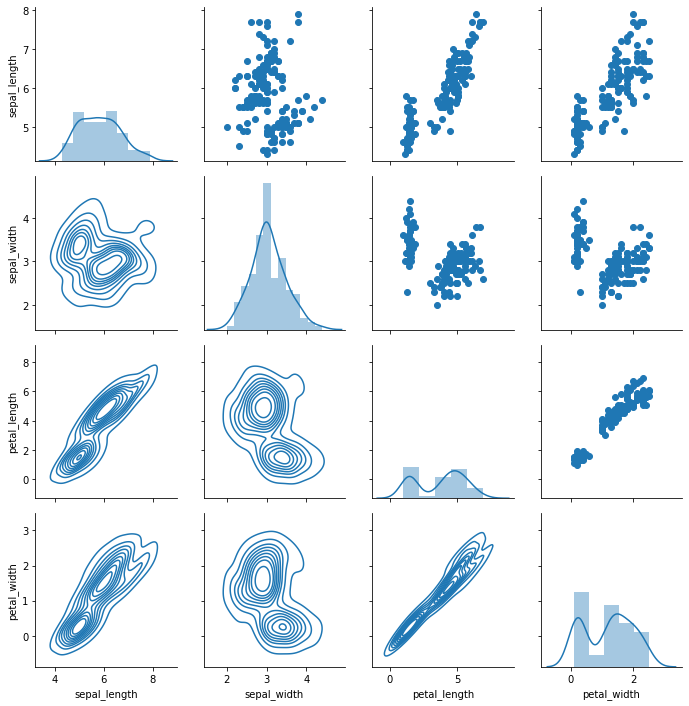

In [69]:
g = sns.PairGrid(iris) # makes a plain canvas and then we map plot tipes on that grid
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [70]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/Users/przemyslawgolonka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/przemyslawgolonka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/przemyslawgolonka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

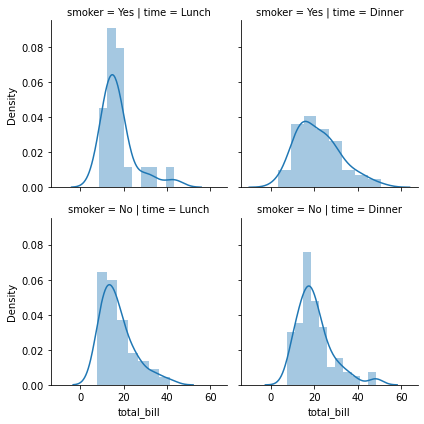

In [72]:
g = sns.FacetGrid(data=tips,col='time',row='smoker') # we pass variables we want to separate by an argument 
g.map(sns.distplot,'total_bill')

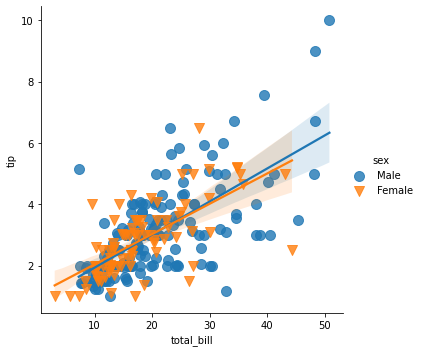

In [76]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':100}) #scatter_kws affects the size of a markers, refer to a documentation!

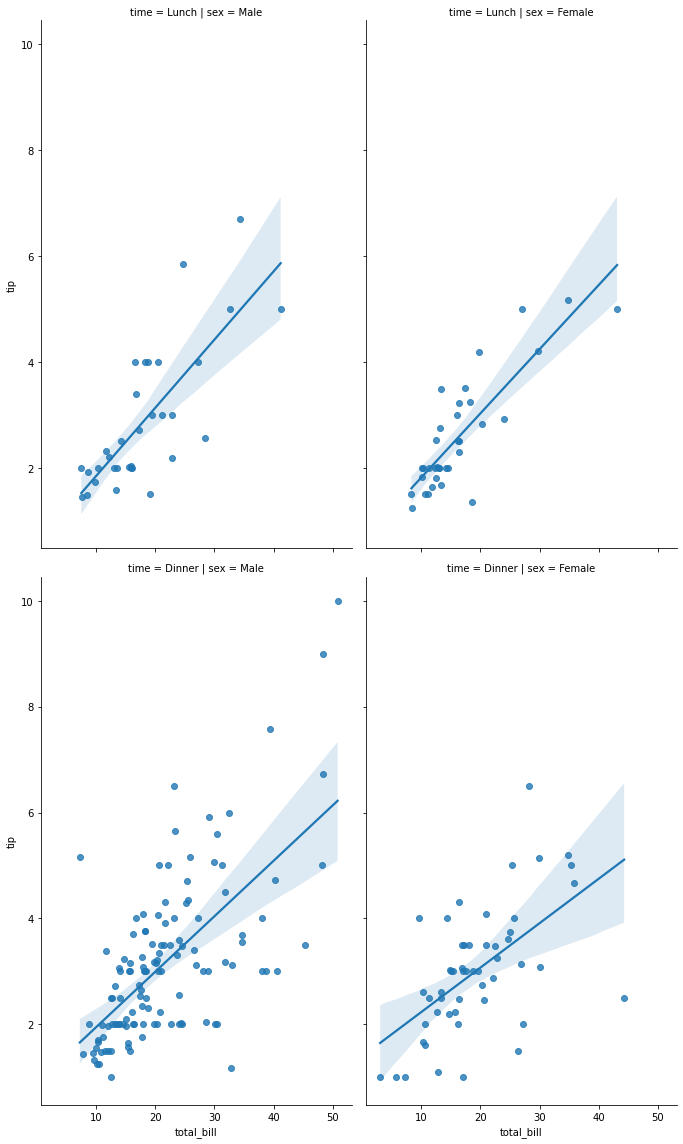

In [80]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time',
          aspect=0.6,height=8) #size renamed for height

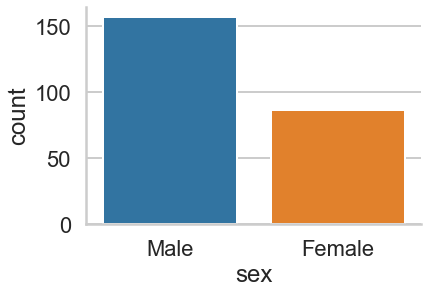

In [87]:

# sns.set_style('whitegrid')
sns.set_context('poster')
sns.countplot(x='sex',data=tips)
sns.despine() #removes top and right spine by default

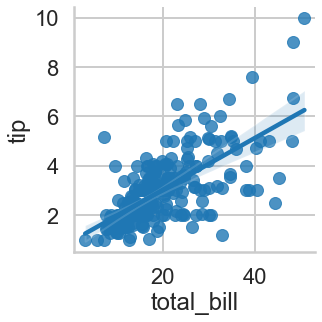

In [90]:
sns.lmplot(x='total_bill',y='tip',data=tips)

In [ ]:
# colormaps from matplot lib documentation